In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
def calc_income_per_month(rent, load):
    return rent_price_per_day*rent_load/100*30

In [173]:
def calc_car_residual_price(current_price, month_count, loss_rate):
    return round(current_price * (1-loss_rate/100)**(month_count/12))

In [43]:
def calc_total_income(month_count):
    return calc_income_per_month(rent_price_per_day, rent_load)*month_count+calc_car_residual_price(car_price, month_count, car_price_loss_rate_per_year)

In [196]:
def calc_total_cost(month_count):
    return (service_price+insurance_price) * ((month_count - 1) // 12 + 1) + car_price

In [192]:
def calc_percentage(month_count):
    total_income = calc_total_income(month_count)
    total_cost = calc_total_cost(month_count)
    return (total_income-total_cost)/total_cost*100/(month_count / 12)

In [227]:
max_month_value = 7*12
df = pd.DataFrame(
    {
        'month': list(range(1, max_month_value+1)),
        'total_cost': max_month_value*[0],
        'total_income': max_month_value*[0],
        'residual_price': max_month_value*[0],
        'percentage': max_month_value*[0]
    }
)

In [245]:
car_price = 1200000 # Стоимость машины
rent_price_per_day = 2500 # Стоимость аренды в день
rent_load = 100 # загруженность машины в месяц (%)
service_price = 60000 # обслуживание в год
insurance_price = 60000 # страховка в год
car_price_loss_rate_per_year = 30 # потеря в стоимости машины в год (%)

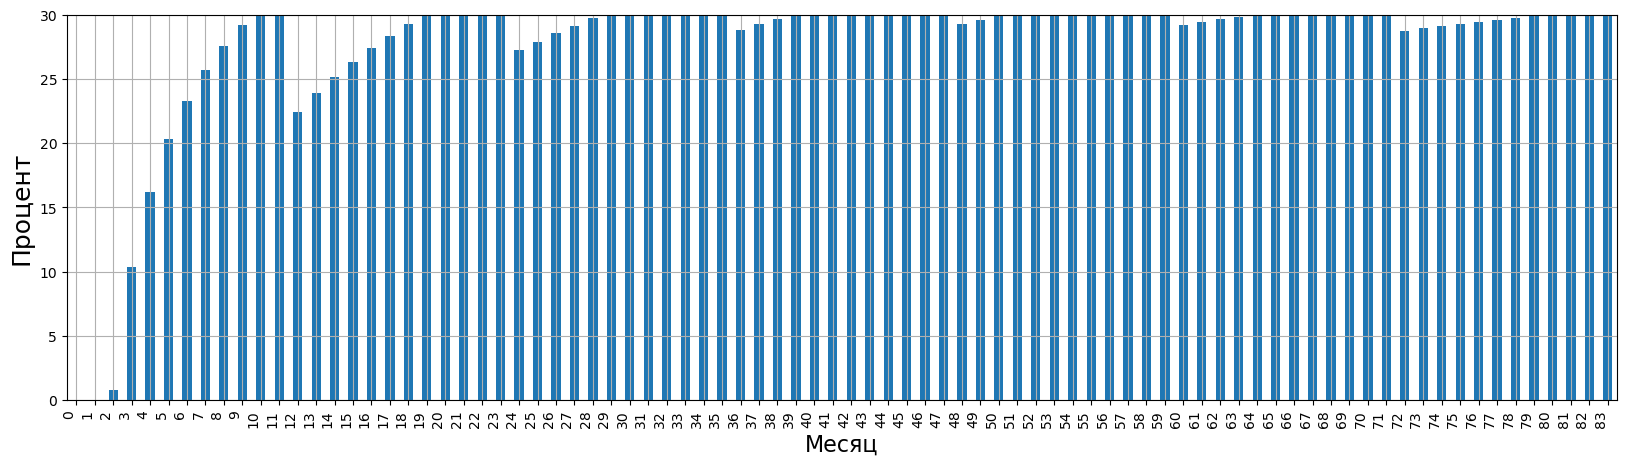

In [246]:
df['total_cost'] = calc_total_cost(df['month'])
df['total_income'] = calc_income_per_month(rent_price_per_day, rent_load)*df['month']
df['residual_price'] = calc_car_residual_price(car_price, df['month'], car_price_loss_rate_per_year)
df['percentage'] = calc_percentage(df['month'])
ax = df.percentage.plot(kind="bar", figsize=(20, 5), grid=True)
plt.title("", fontsize=32)
plt.xlabel("Месяц", fontsize=16)
plt.ylabel(f"Процент", fontsize=18)
plt.ylim(0, 30)
plt.xticks(fontsize=10, rotation=90, horizontalalignment="right");

In [247]:
month_count_value = 60
print(f"Количество месяцев: {month_count_value}")
print(f"Затраты за весь период: {int(calc_total_cost(month_count_value))}")
print(f"Доход в месяц: {int(calc_income_per_month(rent_price_per_day, rent_load))}")
print(f"Доход за весь период: {int(calc_income_per_month(rent_price_per_day, rent_load)*month_count_value)}")
print(f"Остаточная стоимость автомобиля: {int(calc_car_residual_price(car_price, month_count_value, car_price_loss_rate_per_year))}")
print(f"Процент годовых: {calc_percentage(month_count_value):0f}%")

Количество месяцев: 60
Затраты за весь период: 1800000
Доход в месяц: 75000
Доход за весь период: 4500000
Остаточная стоимость автомобиля: 201684
Процент годовых: 32.240933%
